In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
mpz = pd.read_csv('mimicDataPerformance.csv')

In [7]:
mpz = mpz[mpz['Model']!='Random Forest'].reset_index(drop=True)
table_4 = mpz

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


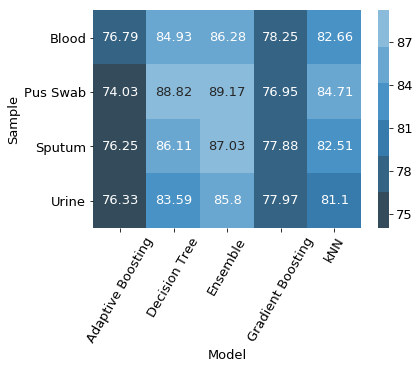

In [34]:
accuracy = table_4[['Sample', 'Model', 'Accuracy']]
accuracy.Accuracy = accuracy.Accuracy.apply(lambda x: np.round(100*x, decimals=2))
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})
result = accuracy.pivot(index='Sample', columns='Model', values='Accuracy')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=60)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


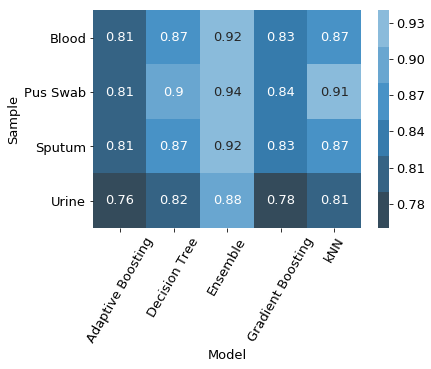

In [36]:
auc = table_4[['Sample', 'Model', 'AUC_ROC']]
auc.AUC_ROC = auc.AUC_ROC.apply(lambda x: np.round(x, decimals=2))
import seaborn as sns
import matplotlib.pyplot as plt
result = auc.pivot(index='Sample', columns='Model', values='AUC_ROC')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=60)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


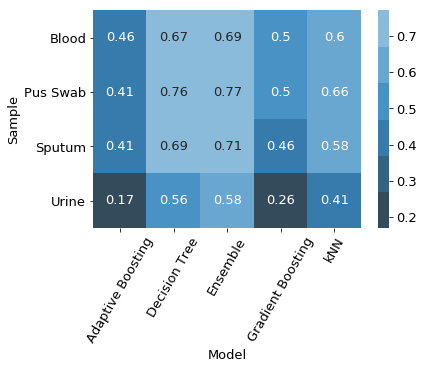

In [37]:
kappa = table_4[['Sample', 'Model', 'Kappa']]
kappa.Kappa = kappa.Kappa.apply(lambda x: np.round(x, decimals=2))
import seaborn as sns
import matplotlib.pyplot as plt
result = kappa.pivot(index='Sample', columns='Model', values='Kappa')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=60)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


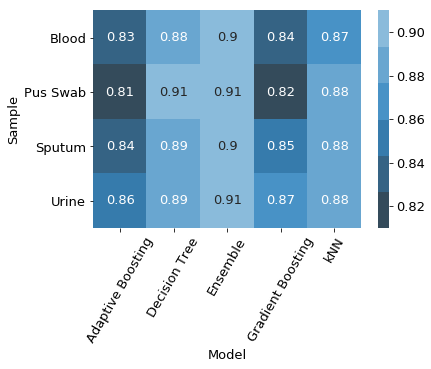

In [38]:
f1 = table_4[['Sample', 'Model', 'F1_score']]
f1.F1_score = f1.F1_score.apply(lambda x: np.round(x, decimals=2))
import seaborn as sns
import matplotlib.pyplot as plt
result = f1.pivot(index='Sample', columns='Model', values='F1_score')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=60)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


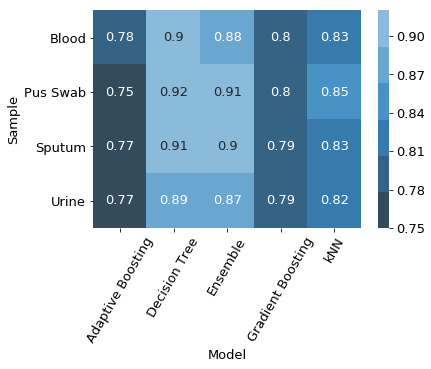

In [39]:
p = table_4[['Sample', 'Model', 'Precision']]
p.Precision = p.Precision.apply(lambda x: np.round(x, decimals=2))
import seaborn as sns
import matplotlib.pyplot as plt
result = p.pivot(index='Sample', columns='Model', values='Precision')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=60)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


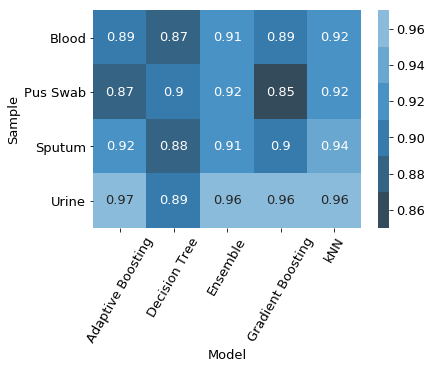

In [40]:
r = table_4[['Sample', 'Model', 'Recall']]
r.Recall = r.Recall.apply(lambda x: np.round(x, decimals=2))
import seaborn as sns
import matplotlib.pyplot as plt
result = r.pivot(index='Sample', columns='Model', values='Recall')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=60)
plt.show()

In [42]:
mimic = pd.read_csv('zevac_data.csv',sep='\t')

In [43]:
mimic=mimic[['patient_id', 'admission_id', 'age', 'sex', 'sc_date',
       'sample_type', 'bacteria_name', 'antibiotic_name', 'num_prev_adm',
       'interval', 'device', 'susceptibility', 'comorbidity']]

In [44]:
mimic.susceptibility = mimic.susceptibility.replace({'I': 'R'})

In [46]:
from mlens.visualization import corrmat
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
ensembleModels = {'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0), 
          'Decision Tree':DecisionTreeClassifier(), 'Adaptive Boosting': AdaBoostClassifier(), 
          'Gradient Boosting': GradientBoostingClassifier(), 'Naive Bayes': GaussianNB(),
          'Logistic Regression': LogisticRegression(), 'k Nearest Neighbors': KNeighborsClassifier(n_neighbors = 13, metric= 'hamming')}
metaLearner = GradientBoostingClassifier(n_estimators=1000, loss='exponential', max_features=5,
                                         max_depth=4, subsample=0.5, learning_rate=0.005)

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [70]:
features = ['age', 'sex', 'num_prev_adm', 'interval', 'comorbidity',
       'device', 'antibiotic_name']
sampleData = mimic[mimic.sample_type=='Blood']
uniqueData = sampleData.drop_duplicates().reset_index(drop=True)
filteredData = uniqueData[features + ['susceptibility']]
labelEncoder = preprocessing.LabelEncoder()
encodedData = filteredData.apply(labelEncoder.fit_transform)
train, test = train_test_split(encodedData, test_size=0.3)
Xtrain = train[features]
Xtest = test[features]
ytrain = train['susceptibility']
ytest = test['susceptibility']
probabilityMatrix = np.zeros((test.shape[0], len(ensembleModels)))
for i, (name, model) in enumerate(ensembleModels.items()):
    model.fit(Xtrain, ytrain)
    probabilityMatrix[:,i] = model.predict_proba(Xtest)[:, 1]
    print(name)

Random Forest
Decision Tree
Adaptive Boosting
Gradient Boosting
Naive Bayes
Logistic Regression
k Nearest Neighbors


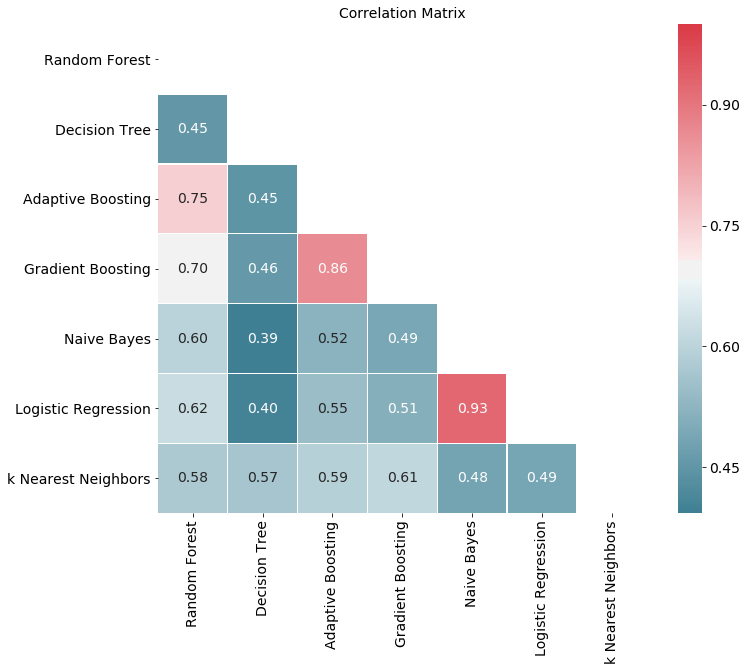

In [54]:
P=pd.DataFrame(probabilityMatrix)
columns=[]
for i, (name, model) in enumerate(ensembleModels.items()):
    columns.append(name)
P.columns=columns
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - ytest.values).corr(), inflate=False)
plt.rcParams.update({'font.size': 14})
plt.show()

In [71]:
metaLearner = GradientBoostingClassifier(n_estimators=1000, loss='exponential', max_features=4,
                                         max_depth=3, subsample=0.5, learning_rate=0.005)
metaLearner.fit(probabilityMatrix, ytest)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='exponential', max_depth=3,
              max_features=4, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [72]:
probabilities = metaLearner.predict_proba(probabilityMatrix)[:, 1]

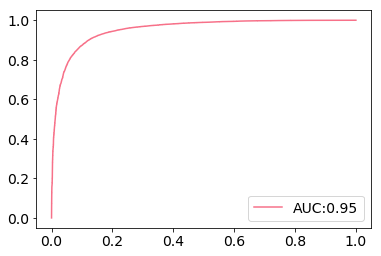

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(ytest,  probabilities)
auc = roc_auc_score(ytest, probabilities)
plt.plot(fpr,tpr,label="AUC:"+str(np.round(auc, decimals=2)))
plt.legend(loc=4)
plt.show()